<a href="https://colab.research.google.com/github/pzuniga/Milk_quality_prediction/blob/main/wk7_012_Proyecto_2_Parte_2_(base).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODING DOJO - BOOTCAMP DATA SCIENCE - SPANISH**
**wk7_Proyecto 2 - Parte 1 (base)**

Pablo Zúñiga N. / ZetaLabs
20220908

#0.Desafío a solucionar
**Tarea**

Deben proponer dos conjuntos de datos que tengan cada uno un componente de aprendizaje supervisado. Pueden elegir un problema de regresión o clasificación para cada conjunto de datos propuesto.  

Para esta tarea:

Creen un cuaderno de Colab donde hayan subido y mostrado el .head() de cada uno de los conjuntos de datos.  Para cada uno de los conjuntos de datos propuestos, respondan las siguientes preguntas:

Primera opción: conjunto de datos 1

1. Predicción de la calidad de la Leche

1) Fuente de datos: Kaggle

2) Breve descripción de datos

Conjunto de datos que ha sido recopilado manualmente y que conta de siete variables independientes, tales como: pH, temperatura, sabor, olor, grasa, tubidez y color. Generalemente, el nivel de calidad de la leche depende de estos parámetros, siendo entonces, relevantes en este análisis predictivo.

3) ¿Cuál es el objetivo?

La variable objetivo es el nivel de calidad de la leche, pudiendo ser tres niveles: Baja, Media o Alta.

4) ¿Este es un problema de clasificación o regresión?

Es un problema de clasificación

5) ¿Cuántas características hay?

Incluye siete características, siendo éstas: pH, temperatura, sabor, olor, grasa, tubidez y color.

6) ¿Cuántas filas de datos hay?
1059 filas

7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

Para las etapas se tienn los siguiente retos:
* Limpieza: evaluar la consistencia de los datos
* Exploración: graficar y buscar las relaciones entre las características y el objetivo.
* Preprocesamiento: transformar todos los datos para dejarlos disponibles para el modelo ML.
* Procesamiento: evaluar y comparar las métricas de diferentes modelos ML e identificar el mejor.

In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno                                  # Graficar valores faltantes
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer

# Instancias de modelo de predicción
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree                                  # Visualizar árbol
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Métricas de regresión
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Métricas de clasificación
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Afinar hiperparámetros ML
from sklearn.model_selection import GridSearchCV

# Estas líneas permite revisar visualmente el pipeline
from sklearn import set_config
set_config(display='diagram') # Para mostrar como diagrama

In [3]:
# Montar el directorio de datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Crear variable con ruta de acceso al archivo
filename_csv = "/content/drive/MyDrive/Colab Notebooks/wk7_Datos/milknew.csv"

# **1. Limpieza de datos**

## 1.1. Análisis preliminar: cargar datos, Head(), tail(), info(), shape()

In [5]:
# 1.1.1. Cargar archivo de datos en df
# Cargar datos CSV  y asignar a dataframe df
df=pd.read_csv(filename_csv)

In [6]:
# 1.1.2. Revisar la cabeza
df.head(10)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
5,6.6,37,1,1,1,1,255,high
6,5.5,45,1,0,1,1,250,low
7,4.5,60,0,1,1,1,250,low
8,8.1,66,1,0,1,1,255,low
9,6.7,45,1,1,0,0,247,medium


In [7]:
# 1.1.3. Revisar la cola
df.tail(10)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1049,6.5,37,0,0,0,0,255,medium
1050,6.6,37,1,1,1,1,255,high
1051,5.5,45,1,0,1,1,250,low
1052,6.5,40,1,0,0,0,250,medium
1053,8.1,66,1,0,1,1,255,low
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [8]:
# 1.1.4. Obtener la descripción de df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


### **Metadatos**

In [9]:
# 1.1.5. Mostrar la forma del df
# filas/columnas
df.shape

(1059, 8)

## 1.2. Revisar y tratar filas duplicadas

In [10]:
# Búsqueda de duplicados
# No existen duplicados en df
df.duplicated().sum()

976

## 1.3. Revisar y tratar valores faltantes
Se incluye una breve descripción del tratamiento: método y justificación.

###1.3.1. Identificación de valores faltantes - iteración #1

In [11]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [12]:
# Identificar y abordar cualquier dato que falte en este conjunto de datos.
# Columnas con datos faltantes
# No existen
df.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

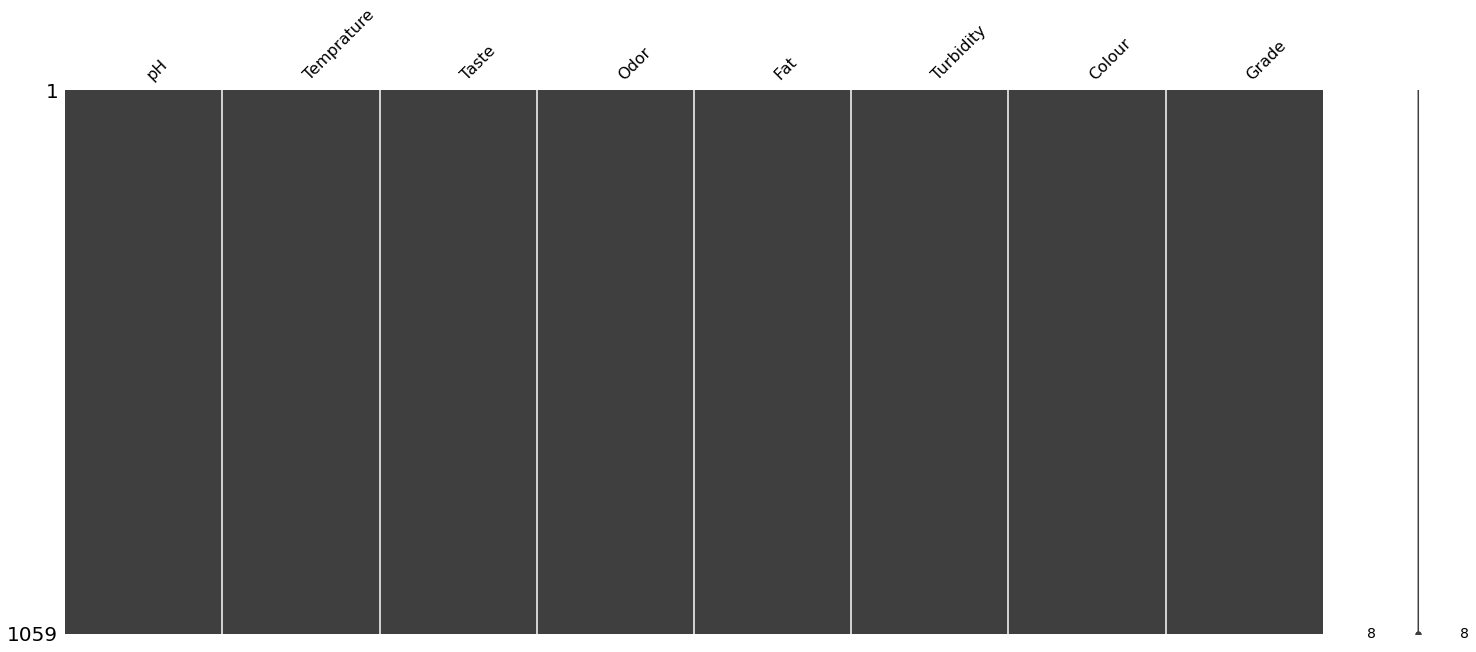

In [13]:
# Grafico de valores faltantes, visión integral
# Todas las columnas se encuentran pobladas de datos.
# Sin embargo, se advierte la necesidad de revisar la consistencia de los valores e iterar el proceso de datos faltantes.
msno.matrix(df)

## 1.4. Revisar y tratar valores incosistentes
Se incluye una breve descripción del tratamiento: método y justificación.

In [14]:
# Estadística descriptiva del conjunto de datos
# No se aprecian datos inconsistences en los valores
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [15]:
# 1.4.1. Revisar valores inconsistente de datos 'Grade'
# Diagnóstico: El conjunto de datos está relativamente equilibrado en las clases presentes en la columna objetivo
# tres clases de calidad de la leche a razón low/medium/high 40%/35%/25%
# Tratamiento: aplicar stratify=yes en separación train/test
df['Grade'].value_counts(normalize='True')

low       0.405099
medium    0.353163
high      0.241737
Name: Grade, dtype: float64

In [22]:
# Hallazgo: No se observan datos inconsistentes.
# Tratamiento: no aplica.
# Típicamente el ph puede variar entre [0,14]
df['pH'].value_counts().sort_index(ascending=True)

3.0     70
4.5     37
4.7     20
5.5     23
5.6     19
6.4      1
6.5    189
6.6    159
6.7     82
6.8    249
7.4     39
8.1     24
8.5     22
8.6     40
9.0     61
9.5     24
Name: pH, dtype: int64

In [23]:
# Hallazgo: No se observan datos inconsistentes.
# Tratamiento: no aplica.
df['Temprature'].value_counts().sort_index(ascending=True)

34     40
35     23
36     66
37     83
38    179
40    132
41     30
42      1
43     77
45    219
50     58
55     48
60     18
65     22
66     24
70     22
90     17
Name: Temprature, dtype: int64

In [24]:
# Hallazgo: No se observan datos inconsistentes.
# Tratamiento: no aplica.
df['Colour'].value_counts().sort_index(ascending=True)

240     32
245    115
246     44
247     48
248     23
250    146
253     22
254      1
255    628
Name: Colour, dtype: int64

In [ ]:
# Las características 'Taste', 'Odor', 'Fat', 'Turbidity' son nominales binarias y,
# puede observarse su distribución en el siguiente gráfico

# **2. Exploración de datos**

##2.1. Histogramas y boxplots de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


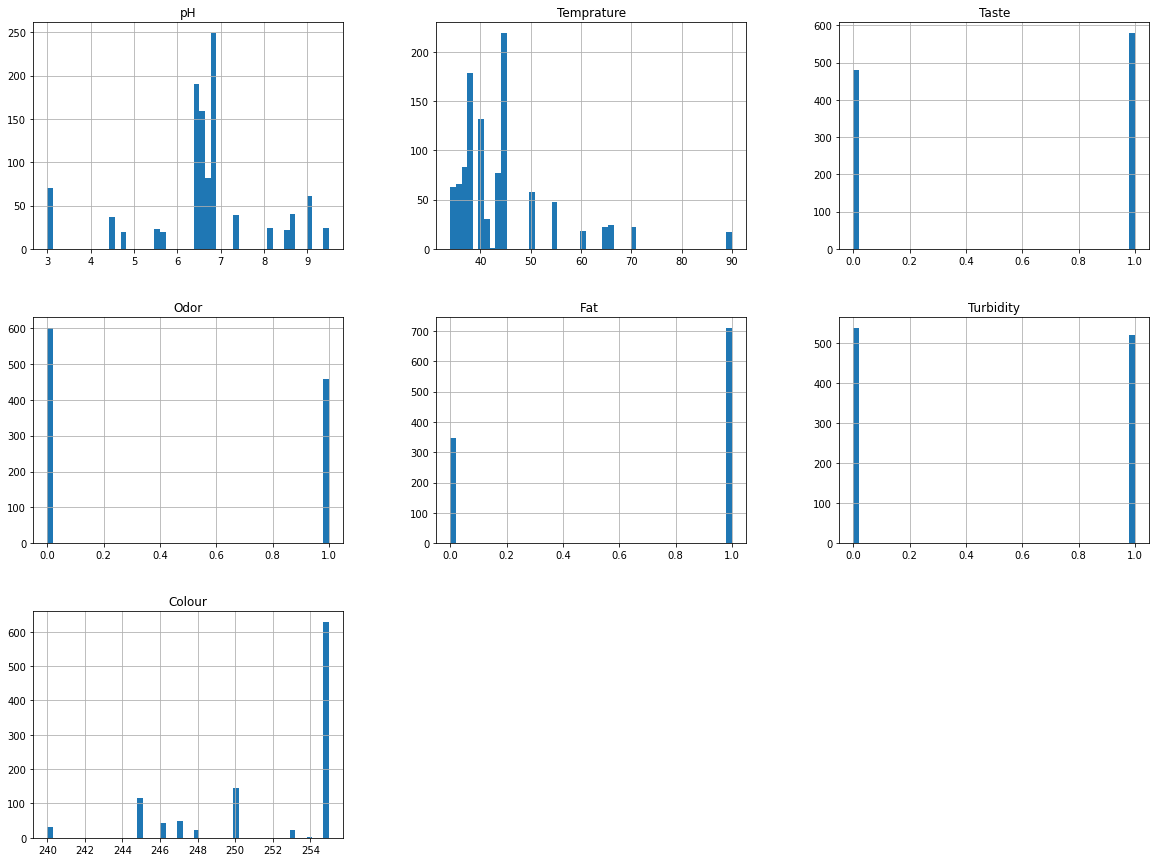

In [ ]:
# Histograma de las columnas del df
df.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

In [ ]:
df.columns


Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

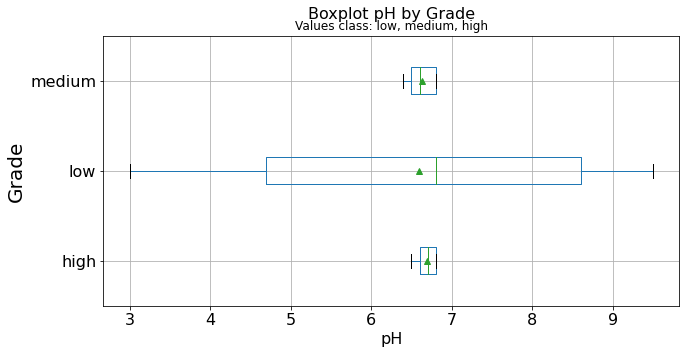

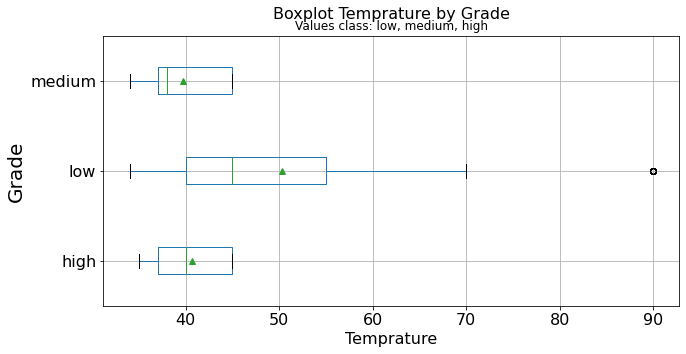

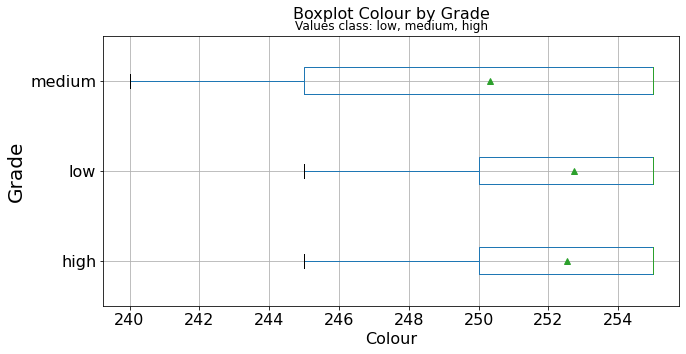

In [ ]:
# Boxplot de características numéricas según clases de columna objetivo
# Crear lista con los índices de una lista
# Columnas de interés

list_column = ['pH', 'Temprature', 'Colour']
# Bucle para graficar boxplot
for index,col in enumerate(list_column):
  Title=('Boxplot ' + col +' by Grade\n ')
  df.boxplot(column=[col],
                    by='Grade',
                    vert=False,
                    #notch=True,
                    showmeans=True,
                    figsize=(10,5))
  plt.suptitle(Title,fontsize=16);
  plt.title('Values class: low, medium, high');
  plt.xlabel(col, fontsize = 16);
  plt.ylabel('Grade', fontsize = 20);
  plt.xticks(fontsize = 16);
  plt.yticks(fontsize = 16);
  plt.show

## 2.2. Correlaciones

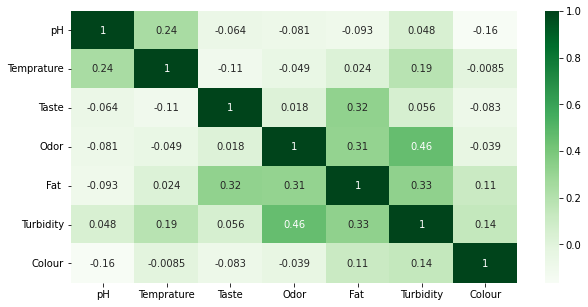

In [ ]:
# La correlación más mayor fuerza en el conjunto de datos son:
corr = df.corr()
# Crear mapa de calor de correlaciones
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr, cmap = 'Greens', annot = True)

In [ ]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

## 2.3. Gráficos de dispersión para análisis de regresión logística

In [ ]:
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [ ]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [ ]:
# Convertir los nombres de cadenas de las clases a valores numéricos
# Se decidió trabajar con dos clases
df['Grade'] = df['Grade'].replace({'low': 0, 'medium': 0, 'high':1})

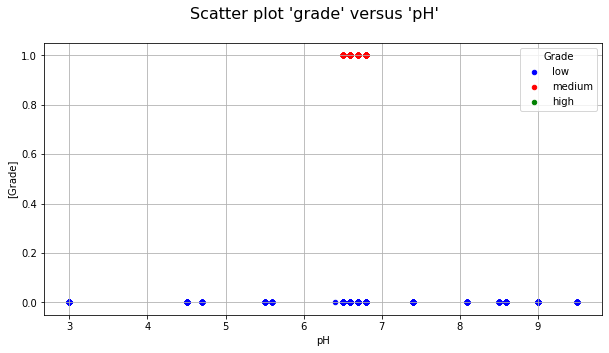

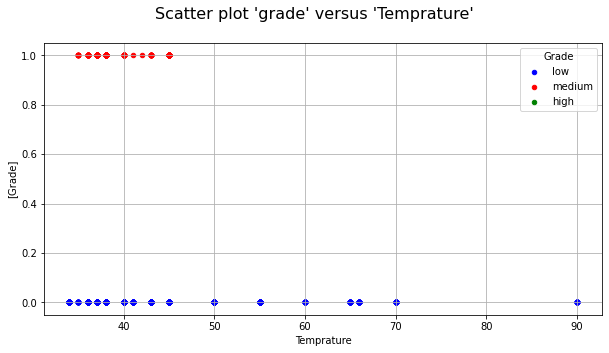

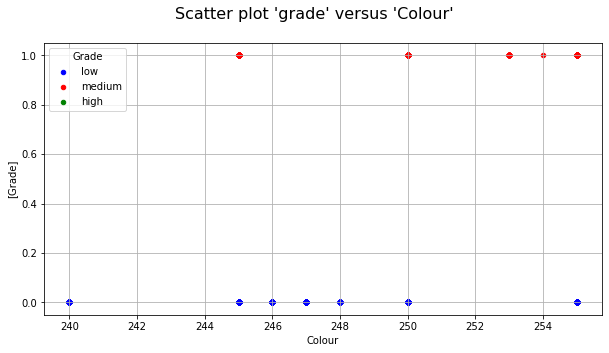

In [ ]:
# Crear lista con los índices de una lista
# Columnas de interés

Y=['Grade']
X_list_column = ['pH', 'Temprature', 'Colour']
# Lista de 'Class label' y color asignado en gráfico
Z_list_Outcome=[[0,'b'],[1,'r'],[2,'g']]
# Bucle para graficar boxplot
for index,col in enumerate(X_list_column):

  for index_s,sp in enumerate (Z_list_Outcome):
    # Crear filtro según especie
    Outcome_df=df['Grade']==sp[0]
    Title=("Scatter plot 'grade' versus '" + col +"'")
    # Parametrización de curvas
    if index_s==0:
      ax=df.loc[Outcome_df,:].plot(x=col,y=Y,kind='scatter',
                                   color=sp[1],label=sp[0],
                                   figsize=(10,5),
                                   )
      plt.suptitle(Title,fontsize=16);
      plt.title('')
      plt.xlabel(col)
      #plt.ylabel('Weight')
    else:
      df.loc[Outcome_df,:].plot(x=col,y=Y,kind='scatter', ax=ax, color=sp[1],label=sp[0])
    plt.legend(labels=['low','medium','high'],title='Grade')
    plt.grid(True)
    plt.show


# **3. Preprocesamiento de datos para ML**

## 3.1. Identificar matriz de características (X) y vector objetivo (y).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 66.3 KB


## 3.2. Codificar características ordinales

## 3.3. Separar los datos en un matriz de características (X) y un vector objetivo (y).

In [ ]:
y=df['Grade']
X=df.drop(columns=['Grade'])

## 3.4. Crear un train test split en los datos. Utilicen un número aleatorio 42 por coherencia.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,stratify=y,test_size=0.3)

## 3.5. Crear instancia de selectores de columnas

In [ ]:
# Crear instancia de selectores de columnas
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

## 3.6. Crear instancia de transformadores

In [ ]:
# Crear instancia de transformadores
freq_imputer= SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
scaler=StandardScaler()
ohe=OneHotEncoder(handle_unknown='ignore',sparse=False)

## 3.7. Crear instancia de pipeline

In [ ]:
# Pipeline numérico
numeric_pipe = make_pipeline(mean_imputer,scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
# Pipeline categórico
categorical_pipe = make_pipeline(freq_imputer,ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

## 3.8. Crear instancia de ColumnTransformer

In [ ]:
# Tuplas para Column_Tranformer
number_tuple=(numeric_pipe,num_selector)
category_tuple=(categorical_pipe,cat_selector)

# Crear instancia ColumnTransformer
preprocessor = make_column_transformer(number_tuple,category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8bbdc03ed0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8bbdc03ad0>)])

## 3.9. Aplicar transformador de datos

In [ ]:
# Ajustar pipeline en los datos de entrenamiento
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8bbdc03ed0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8bbdc03ad0>)])

In [ ]:
# Transformar conjunto de datos de entrenamiento y prueba
X_train_processed=preprocessor.transform(X_train)
X_test_processed=preprocessor.transform(X_test)

3.10. Examinar resultado

In [ ]:
# Examinar resultado de la transformación
print('\n______________')
print("Valores faltantes en conjunto entrenamiento:",np.isnan(X_train_processed).sum().sum())
print("Valores faltantes en conjunto pruebas:",np.isnan(X_test_processed).sum().sum())
print('\n______________')
print('Todos los datos en X_train_processed son de tipo:',X_train_processed.dtype)
print('Todos los datos en X_test_processed son de tipo:',X_test_processed.dtype)
print('\n______________')
print('La forma de los datos es:',X_train_processed.shape)
print('\n______________')

X_train_processed


______________
Valores faltantes en conjunto entrenamiento: 0
Valores faltantes en conjunto pruebas: 0

______________
Todos los datos en X_train_processed son de tipo: float64
Todos los datos en X_test_processed son de tipo: float64

______________
La forma de los datos es: (741, 7)

______________


array([[-2.53877796, -0.42730087,  0.91332273, ...,  0.6942622 ,
         0.99595958,  0.70327987],
       [ 0.12774857, -0.62221004, -1.09490322, ..., -1.440378  ,
        -1.00405681,  0.70327987],
       [-0.08276668, -0.71966463, -1.09490322, ..., -1.440378  ,
        -1.00405681, -1.64627101],
       ...,
       [ 0.12774857, -0.32984629, -1.09490322, ...,  0.6942622 ,
        -1.00405681,  0.70327987],
       [-0.08276668, -0.81711921, -1.09490322, ...,  0.6942622 ,
        -1.00405681,  0.70327987],
       [ 0.05757682, -0.32984629,  0.91332273, ..., -1.440378  ,
        -1.00405681, -1.17636083]])

# 4.Modelos de regresión múltiple con ML

##4.1. Árbol de regresión

###4.1.1. Modelo por defecto

Métricas de evaluación del modelo ML
Nombre del modelo: DecisionTreeClassifier
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Clasification report - train
----------------------------
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       562
         Yes       1.00      1.00      1.00       179

    accuracy                           1.00       741
   macro avg       1.00      1.00      1.00       741
weighted avg       1.00      1.00      1.00       741

-----------------------------------------------------
Conjunto de datos de prueba:
Accuracy: 0.9937
Precision: 1.0
Recall: 0.974
Specificity: 1.0
Clasification report - test
----------------------------
              precision    recall  f1-score   support

          No     0.9918    1.0000    0.9959       241
         Yes     1.0000    0.9740    0.9868        77

    accuracy                         0

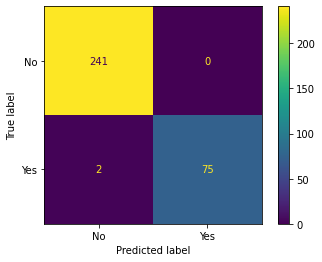


ROC Curve - test
----------------------------
Testing AUC: 0.987


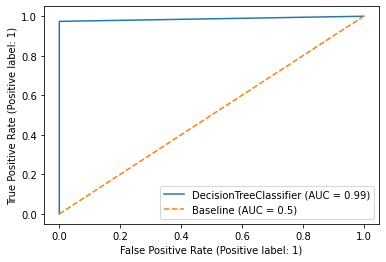

In [ ]:
# Crear instancia de modelo de regresión ML
dec_tree=DecisionTreeClassifier(random_state=42)

#Entrenar modelo con datos de entrenamiento
dec_tree.fit(X_train_processed,y_train)

# Obtener predicciones del conjunto de entrenamiento
train_preds=dec_tree.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=dec_tree.predict(X_test_processed)

# MÉTRICAS DE EVALUACIÓN
# Accuracy
accuracy_train = accuracy_score(y_train, train_preds)
accuracy_test = accuracy_score(y_test, test_preds)
# Precision
precision_train = precision_score(y_train, train_preds)
precision_test = precision_score(y_test, test_preds)
# Recall
recall_train = recall_score(y_train, train_preds)
recall_test = recall_score(y_test, test_preds)
# Matriz de confusión
cm = confusion_matrix(y_test, test_preds)
target_names = ['No', 'Yes']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
# Specificity
specificity_test = cm[0,0]/(cm[0,0]+cm[0,1])
#Área bajo la curva de ROC
AUC_train=roc_auc_score(y_train, dec_tree.predict_proba(X_train_processed)[:,1])
AUC_test=roc_auc_score(y_test, dec_tree.predict_proba(X_test_processed)[:,1])

# Guardar resultados del modelo ML
bench_model_df  = pd.DataFrame([['DecisionTreeClassifier',accuracy_train,precision_train,recall_train,AUC_train,accuracy_test,
                                 precision_test,recall_test,specificity_test,AUC_test]],
                                index=[0],
                                columns=['Name_model', 'accuracy_train','precision_train','recall_train','AUC_train','accuracy_test',
                                 'precision_test','recall_test','specificity_test','AUC_test'])


## Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo ML')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Accuracy:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Precision:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Recall:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Clasification report - train')
print('----------------------------')
print(classification_report(y_train, train_preds, target_names=target_names))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Accuracy:',round(bench_model_df.loc[len(bench_model_df)-1][5],4))
print('Precision:',round(bench_model_df.loc[len(bench_model_df)-1][6],4))
print('Recall:',round(bench_model_df.loc[len(bench_model_df)-1][7],4))
print('Specificity:',round(bench_model_df.loc[len(bench_model_df)-1][8],4))
print('Clasification report - test')
print('----------------------------')
print(classification_report(y_test, test_preds, target_names=target_names, digits=4))
print('Confusion matrix - test')
print('----------------------------')
disp.plot()
plt.show()
print('\nROC Curve - test')
print('----------------------------')
print(f'Testing AUC: {round(bench_model_df.loc[len(bench_model_df)-1][9],4)}')
RocCurveDisplay.from_estimator(dec_tree, X_test_processed, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();
plt.show()

In [ ]:
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity

1.0

In [ ]:
bench_model_df

,Name_model,accuracy_train,precision_train,recall_train,AUC_train,accuracy_test,precision_test,recall_test,specificity_test,AUC_test
0,DecisionTreeClassifier,1.0,1.0,1.0,1.0,0.993711,1.0,0.974026,1.0,0.987013


###4.1.2. Modelo con hiperparámetro(s) afinado(s)


In [ ]:
# Parámetros e hiperparámetros del modelo
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, 36))# will try every value between 2 and 36
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

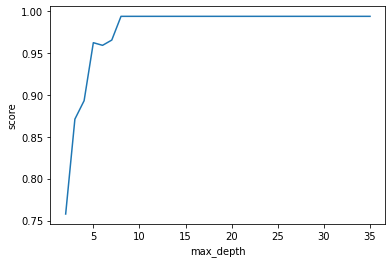

In [ ]:
# Visualicen qué max_depth lleva a una puntuación R2 más alta
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('score');

Métricas de evaluación del modelo ML
Nombre del modelo: DecisionTreeClassifier_max_depth_3
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Accuracy: 0.89
Precision: 0.72
Recall: 0.91
Clasification report - train
----------------------------
              precision    recall  f1-score   support

          No       0.97      0.89      0.93       562
         Yes       0.72      0.91      0.80       179

    accuracy                           0.89       741
   macro avg       0.84      0.90      0.86       741
weighted avg       0.91      0.89      0.90       741

-----------------------------------------------------
Conjunto de datos de prueba:
Accuracy: 0.8711
Precision: 0.68
Recall: 0.8831
Specificity: 0.8672
Clasification report - test
----------------------------
              precision    recall  f1-score   support

          No     0.9587    0.8672    0.9107       241
         Yes     0.6800    0.8831    0.7684        77

    accuracy      

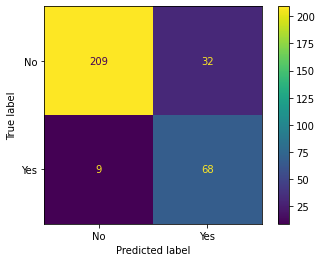


ROC Curve - test
----------------------------
Testing AUC: 0.9203


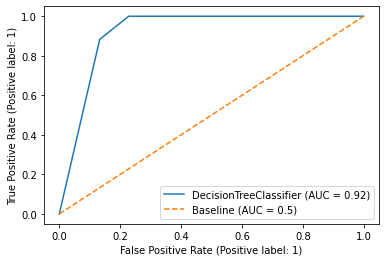

In [ ]:
# Crear instancia de modelo de regresión ML
dec_tree=DecisionTreeClassifier(max_depth=3,random_state=42)

#Entrenar modelo con datos de entrenamiento
dec_tree.fit(X_train_processed,y_train)

# Obtener predicciones del conjunto de entrenamiento
train_preds=dec_tree.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=dec_tree.predict(X_test_processed)

# MÉTRICAS DE EVALUACIÓN
# Accuracy
accuracy_train = accuracy_score(y_train, train_preds)
accuracy_test = accuracy_score(y_test, test_preds)
# Precision
precision_train = precision_score(y_train, train_preds)
precision_test = precision_score(y_test, test_preds)
# Recall
recall_train = recall_score(y_train, train_preds)
recall_test = recall_score(y_test, test_preds)
# Matriz de confusión
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
# Specificity
specificity_test = cm[0,0]/(cm[0,0]+cm[0,1])
#Área bajo la curva de ROC
AUC_train=roc_auc_score(y_train, dec_tree.predict_proba(X_train_processed)[:,1])
AUC_test=roc_auc_score(y_test, dec_tree.predict_proba(X_test_processed)[:,1])

# Crear serie con valores a agregar a df
new_row = pd.Series(['DecisionTreeClassifier_max_depth_3',accuracy_train,precision_train,recall_train,AUC_train,
                     accuracy_test,precision_test,recall_test,specificity_test,AUC_test],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

## Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo ML')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Accuracy:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Precision:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Recall:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Clasification report - train')
print('----------------------------')
print(classification_report(y_train, train_preds, target_names=target_names))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Accuracy:',round(bench_model_df.loc[len(bench_model_df)-1][5],4))
print('Precision:',round(bench_model_df.loc[len(bench_model_df)-1][6],4))
print('Recall:',round(bench_model_df.loc[len(bench_model_df)-1][7],4))
print('Specificity:',round(bench_model_df.loc[len(bench_model_df)-1][8],4))
print('Clasification report - test')
print('----------------------------')
print(classification_report(y_test, test_preds, target_names=target_names, digits=4))
print('Confusion matrix - test')
print('----------------------------')
disp.plot()
plt.show()
print('\nROC Curve - test')
print('----------------------------')
print(f'Testing AUC: {round(bench_model_df.loc[len(bench_model_df)-1][9],4)}')
RocCurveDisplay.from_estimator(dec_tree, X_test_processed, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();
plt.show()

##4.2. Bagging

###4.2.1. Modelo por defecto

Métricas de evaluación del modelo ML
Nombre del modelo: Bagging
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Accuracy: 1.0
Precision: 0.99
Recall: 0.99
Clasification report - train
----------------------------
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       562
         Yes       0.99      0.99      0.99       179

    accuracy                           1.00       741
   macro avg       1.00      1.00      1.00       741
weighted avg       1.00      1.00      1.00       741

-----------------------------------------------------
Conjunto de datos de prueba:
Accuracy: 0.9937
Precision: 0.987
Recall: 0.987
Specificity: 0.9959
Clasification report - test
----------------------------
              precision    recall  f1-score   support

          No     0.9959    0.9959    0.9959       241
         Yes     0.9870    0.9870    0.9870        77

    accuracy                         0.9937   

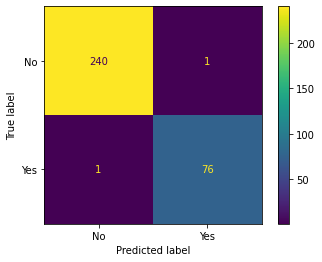


ROC Curve - test
----------------------------
Testing AUC: 0.9999


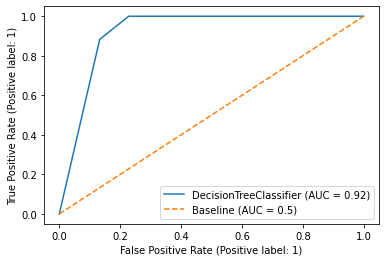

In [ ]:
# Crear instancia del modelo de regresión ML
bagreg = BaggingClassifier(random_state=42)

# Entrenar modelo con datos de entrenamiento
bagreg.fit(X_train_processed,y_train)

# Obtener predicciones del conjunto de entrenamiento
train_preds=bagreg.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=bagreg.predict(X_test_processed)

# MÉTRICAS DE EVALUACIÓN
# Accuracy
accuracy_train = accuracy_score(y_train, train_preds)
accuracy_test = accuracy_score(y_test, test_preds)
# Precision
precision_train = precision_score(y_train, train_preds)
precision_test = precision_score(y_test, test_preds)
# Recall
recall_train = recall_score(y_train, train_preds)
recall_test = recall_score(y_test, test_preds)
# Matriz de confusión
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
# Specificity
specificity_test = cm[0,0]/(cm[0,0]+cm[0,1])
#Área bajo la curva de ROC
AUC_train=roc_auc_score(y_train, bagreg.predict_proba(X_train_processed)[:,1])
AUC_test=roc_auc_score(y_test, bagreg.predict_proba(X_test_processed)[:,1])

# Crear serie con valores a agregar a df
new_row = pd.Series(['Bagging',accuracy_train,precision_train,recall_train,AUC_train,
                     accuracy_test,precision_test,recall_test,specificity_test,AUC_test],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

## Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo ML')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Accuracy:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Precision:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Recall:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Clasification report - train')
print('----------------------------')
print(classification_report(y_train, train_preds, target_names=target_names))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Accuracy:',round(bench_model_df.loc[len(bench_model_df)-1][5],4))
print('Precision:',round(bench_model_df.loc[len(bench_model_df)-1][6],4))
print('Recall:',round(bench_model_df.loc[len(bench_model_df)-1][7],4))
print('Specificity:',round(bench_model_df.loc[len(bench_model_df)-1][8],4))
print('Clasification report - test')
print('----------------------------')
print(classification_report(y_test, test_preds, target_names=target_names, digits=4))
print('Confusion matrix - test')
print('----------------------------')
disp.plot()
plt.show()
print('\nROC Curve - test')
print('----------------------------')
print(f'Testing AUC: {round(bench_model_df.loc[len(bench_model_df)-1][9],4)}')
RocCurveDisplay.from_estimator(dec_tree, X_test_processed, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();
plt.show()

###4.2.2. Modelo con hiperparámetro(s) afinado(s)

In [ ]:
# Parámetros e hiperparámetros del modelo
bagreg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Grilla de parámetros
# Agregar experimentos independientes como diccionarios
# <https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html?highlight=bagging#sklearn.ensemble.BaggingRegressor>
param_grid = [{
    #'base_estimator': (None),
    #'bootstrap': [True,False],
    #'bootstrap_features': [True,False],
    #'max_features': (1.0),
    #'max_samples': (1.0),
    'n_estimators': [int(x) for x in np.linspace(start = 20, stop = 40, num = 20)],
    #'n_jobs': (None),
    #'oob_score': (False),
    'random_state': [42],
    #'verbose': (0),
    #'warm_start': (False)
    }
]

# Crear instancia del modelo de regresión ML
bag_reg = BaggingClassifier(random_state=42)

# Crear instancia de grilla de búsqueda de hiperparámetros
grid_search = GridSearchCV(bag_reg, param_grid, cv=5,        # cd=5 iteraciones para cada prueba
                           return_train_score=True)

# Ajustar la grilla al conjunto de datos de entrenamiento
grid_search.fit(X_train_processed, y_train)

# Notas: desventajas del método con modelos con muchos hiperparámetros, que lo convierte en un ejercicio complejo

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=42),
             param_grid=[{'n_estimators': [20, 21, 22, 23, 24, 25, 26, 27, 28,
                                           29, 30, 31, 32, 33, 34, 35, 36, 37,
                                           38, 40],
                          'random_state': [42]}],
             return_train_score=True)

In [ ]:
# Inicializar instancia de validación cruzada en la regreseión
cvres = grid_search.cv_results_
# zip junta parámetros en dos listas como uno a uno
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values) # Mostramos el accuracy y el n_estimator en cada prueba de validación


(0.9945945945945945, {'n_estimators': 20, 'random_state': 42})
(0.9945945945945945, {'n_estimators': 21, 'random_state': 42})
(0.9945945945945945, {'n_estimators': 22, 'random_state': 42})
(0.9945945945945945, {'n_estimators': 23, 'random_state': 42})
(0.9945945945945945, {'n_estimators': 24, 'random_state': 42})
(0.995945945945946, {'n_estimators': 25, 'random_state': 42})
(0.9945945945945945, {'n_estimators': 26, 'random_state': 42})
(0.9945945945945945, {'n_estimators': 27, 'random_state': 42})
(0.9945945945945945, {'n_estimators': 28, 'random_state': 42})
(0.995945945945946, {'n_estimators': 29, 'random_state': 42})
(0.995945945945946, {'n_estimators': 30, 'random_state': 42})
(0.995945945945946, {'n_estimators': 31, 'random_state': 42})
(0.9945945945945945, {'n_estimators': 32, 'random_state': 42})
(0.995945945945946, {'n_estimators': 33, 'random_state': 42})
(0.9945945945945945, {'n_estimators': 34, 'random_state': 42})
(0.9945945945945945, {'n_estimators': 35, 'random_state': 42

Métricas de evaluación del modelo ML
Nombre del modelo: Bagging_n_estimators_20
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Clasification report - train
----------------------------
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       562
         Yes       1.00      1.00      1.00       179

    accuracy                           1.00       741
   macro avg       1.00      1.00      1.00       741
weighted avg       1.00      1.00      1.00       741

-----------------------------------------------------
Conjunto de datos de prueba:
Accuracy: 0.9969
Precision: 1.0
Recall: 0.987
Specificity: 1.0
Clasification report - test
----------------------------
              precision    recall  f1-score   support

          No     0.9959    1.0000    0.9979       241
         Yes     1.0000    0.9870    0.9935        77

    accuracy                         

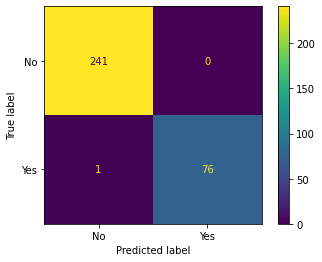


ROC Curve - test
----------------------------
Testing AUC: 0.9999


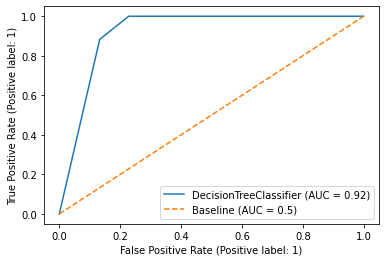

In [ ]:
# Crear instancia del modelo de regresión ML
bagreg_tunn = BaggingClassifier(n_estimators=20,random_state=42)

# Entrenar modelo con datos de entrenamiento
bagreg_tunn.fit(X_train_processed,y_train)

# Obtener predicciones del conjunto de entrenamiento
train_preds=bagreg_tunn.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=bagreg_tunn.predict(X_test_processed)

# MÉTRICAS DE EVALUACIÓN
# Accuracy
accuracy_train = accuracy_score(y_train, train_preds)
accuracy_test = accuracy_score(y_test, test_preds)
# Precision
precision_train = precision_score(y_train, train_preds)
precision_test = precision_score(y_test, test_preds)
# Recall
recall_train = recall_score(y_train, train_preds)
recall_test = recall_score(y_test, test_preds)
# Matriz de confusión
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
# Specificity
specificity_test = cm[0,0]/(cm[0,0]+cm[0,1])
#Área bajo la curva de ROC
AUC_train=roc_auc_score(y_train, bagreg_tunn.predict_proba(X_train_processed)[:,1])
AUC_test=roc_auc_score(y_test, bagreg_tunn.predict_proba(X_test_processed)[:,1])

# Crear serie con valores a agregar a df
new_row = pd.Series(['Bagging_n_estimators_20',accuracy_train,precision_train,recall_train,AUC_train,
                     accuracy_test,precision_test,recall_test,specificity_test,AUC_test],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

## Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo ML')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Accuracy:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Precision:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Recall:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Clasification report - train')
print('----------------------------')
print(classification_report(y_train, train_preds, target_names=target_names))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Accuracy:',round(bench_model_df.loc[len(bench_model_df)-1][5],4))
print('Precision:',round(bench_model_df.loc[len(bench_model_df)-1][6],4))
print('Recall:',round(bench_model_df.loc[len(bench_model_df)-1][7],4))
print('Specificity:',round(bench_model_df.loc[len(bench_model_df)-1][8],4))
print('Clasification report - test')
print('----------------------------')
print(classification_report(y_test, test_preds, target_names=target_names, digits=4))
print('Confusion matrix - test')
print('----------------------------')
disp.plot()
plt.show()
print('\nROC Curve - test')
print('----------------------------')
print(f'Testing AUC: {round(bench_model_df.loc[len(bench_model_df)-1][9],4)}')
RocCurveDisplay.from_estimator(dec_tree, X_test_processed, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();
plt.show()

##4.3. Random Forest

###4.3.1. Modelo por defecto

Métricas de evaluación del modelo ML
Nombre del modelo: RandomForest
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Clasification report - train
----------------------------
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       562
         Yes       1.00      1.00      1.00       179

    accuracy                           1.00       741
   macro avg       1.00      1.00      1.00       741
weighted avg       1.00      1.00      1.00       741

-----------------------------------------------------
Conjunto de datos de prueba:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
Clasification report - test
----------------------------
              precision    recall  f1-score   support

          No     1.0000    1.0000    1.0000       241
         Yes     1.0000    1.0000    1.0000        77

    accuracy                         1.0000       318

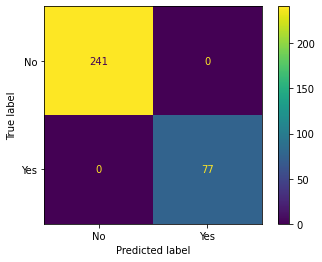


ROC Curve - test
----------------------------
Testing AUC: 1.0


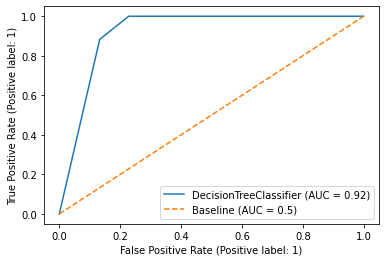

In [ ]:
# Crear instancia del modelo de regresión ML
rf = RandomForestClassifier(random_state = 42)

# Entrenar modelo con datos de entrenamiento
rf.fit(X_train_processed,y_train)

# Obtener predicciones del conjunto de entrenamiento
train_preds=rf.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=rf.predict(X_test_processed)

# MÉTRICAS DE EVALUACIÓN
# Accuracy
accuracy_train = accuracy_score(y_train, train_preds)
accuracy_test = accuracy_score(y_test, test_preds)
# Precision
precision_train = precision_score(y_train, train_preds)
precision_test = precision_score(y_test, test_preds)
# Recall
recall_train = recall_score(y_train, train_preds)
recall_test = recall_score(y_test, test_preds)
# Matriz de confusión
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
# Specificity
specificity_test = cm[0,0]/(cm[0,0]+cm[0,1])
#Área bajo la curva de ROC
AUC_train=roc_auc_score(y_train, rf.predict_proba(X_train_processed)[:,1])
AUC_test=roc_auc_score(y_test, rf.predict_proba(X_test_processed)[:,1])

# Crear serie con valores a agregar a df
new_row = pd.Series(['RandomForest',accuracy_train,precision_train,recall_train,AUC_train,
                     accuracy_test,precision_test,recall_test,specificity_test,AUC_test],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

## Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo ML')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Accuracy:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Precision:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Recall:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Clasification report - train')
print('----------------------------')
print(classification_report(y_train, train_preds, target_names=target_names))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Accuracy:',round(bench_model_df.loc[len(bench_model_df)-1][5],4))
print('Precision:',round(bench_model_df.loc[len(bench_model_df)-1][6],4))
print('Recall:',round(bench_model_df.loc[len(bench_model_df)-1][7],4))
print('Specificity:',round(bench_model_df.loc[len(bench_model_df)-1][8],4))
print('Clasification report - test')
print('----------------------------')
print(classification_report(y_test, test_preds, target_names=target_names, digits=4))
print('Confusion matrix - test')
print('----------------------------')
disp.plot()
plt.show()
print('\nROC Curve - test')
print('----------------------------')
print(f'Testing AUC: {round(bench_model_df.loc[len(bench_model_df)-1][9],4)}')
RocCurveDisplay.from_estimator(dec_tree, X_test_processed, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();
plt.show()

###4.3.2. Modelo con hiperparámetro(s) afinado(s)

In [ ]:
# Revisar hiperparámetros del modelo
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Grilla de parámetros
# Agregar experimentos independientes como diccionarios
# <https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=randomforest#sklearn.ensemble.RandomForestRegressor>
param_grid = [{
    #'bootstrap' : [True,False],
    ##'ccp_alpha' : [0.0],
    ##'criterion' : ('squared_error'),
    #'max_depth'   : [1,2,3] ,
    #'max_features' : ['auto','sqrt'],
    ##'max_leaf_nodes' : (None),
    ##'max_samples' : (None),
    #'min_impurity_decrease' : [0.0],
    #'min_samples_leaf' : [1],     #[1-10% train sample]
    #'min_samples_split' : [2],
    #'min_weight_fraction_leaf' : [0.0],
    'n_estimators' : [int(x) for x in np.linspace(start = 1, stop = 100, num = 100)],
    ##'n_jobs' : (None),
    ##'oob_score' : (False),
    'random_state' : [42],
    ##'verbose' : (0),
    ##'warm_start' : (False)
    }
]
# Crear instancia del modelo de regresión ML
rndf_reg = RandomForestClassifier()

# Crear instancia de grilla de búsqueda de hiperparámetros
grid_search = GridSearchCV(rndf_reg, param_grid, cv=5,        # cd=5 iteraciones para cada prueba
                           return_train_score=True)

# Ajustar la grilla al conjunto de datos de entrenamiento
grid_search.fit(X_train_processed, y_train)


# Notas: desventajas del método con modelos con muchos hiperparámetros, que lo convierte en un ejercicio complejo

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13, 14, 15, 16, 17, 18, 19, 20,
                                           21, 22, 23, 24, 25, 26, 27, 28, 29,
                                           30, ...],
                          'random_state': [42]}],
             return_train_score=True)

In [ ]:
# Inicializar instancia de validación cruzada en la regreseión
cvres = grid_search.cv_results_
# zip junta parámetros en dos listas como uno a uno
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values) # Mostramos el accuracy y el n_estimator en cada prueba de validación

(0.995945945945946, {'n_estimators': 1, 'random_state': 42})
(0.995945945945946, {'n_estimators': 2, 'random_state': 42})
(0.995945945945946, {'n_estimators': 3, 'random_state': 42})
(0.995945945945946, {'n_estimators': 4, 'random_state': 42})
(0.995945945945946, {'n_estimators': 5, 'random_state': 42})
(0.995945945945946, {'n_estimators': 6, 'random_state': 42})
(0.995945945945946, {'n_estimators': 7, 'random_state': 42})
(0.995945945945946, {'n_estimators': 8, 'random_state': 42})
(0.995945945945946, {'n_estimators': 9, 'random_state': 42})
(0.995945945945946, {'n_estimators': 10, 'random_state': 42})
(0.995945945945946, {'n_estimators': 11, 'random_state': 42})
(0.995945945945946, {'n_estimators': 12, 'random_state': 42})
(0.9972972972972972, {'n_estimators': 13, 'random_state': 42})
(0.9972972972972972, {'n_estimators': 14, 'random_state': 42})
(0.9972972972972972, {'n_estimators': 15, 'random_state': 42})
(0.9972972972972972, {'n_estimators': 16, 'random_state': 42})
(0.9972972972

Métricas de evaluación del modelo ML
Nombre del modelo: RandomForest_n_estimators_20
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Clasification report - train
----------------------------
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       562
         Yes       1.00      1.00      1.00       179

    accuracy                           1.00       741
   macro avg       1.00      1.00      1.00       741
weighted avg       1.00      1.00      1.00       741

-----------------------------------------------------
Conjunto de datos de prueba:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
Clasification report - test
----------------------------
              precision    recall  f1-score   support

          No     1.0000    1.0000    1.0000       241
         Yes     1.0000    1.0000    1.0000        77

    accuracy                         

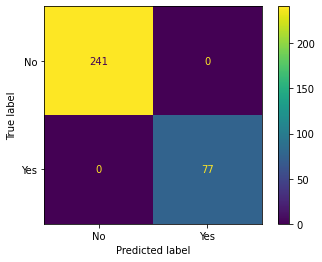


ROC Curve - test
----------------------------
Testing AUC: 1.0


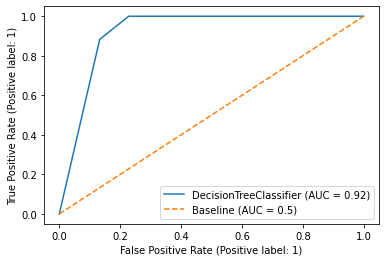

In [ ]:
# Crear instancia del modelo de regresión ML
rf_tunn = RandomForestClassifier(n_estimators=20,random_state = 42)

# Entrenar modelo con datos de entrenamiento
rf_tunn.fit(X_train_processed,y_train)

# Obtener predicciones del conjunto de entrenamiento
train_preds=rf_tunn.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=rf_tunn.predict(X_test_processed)

# MÉTRICAS DE EVALUACIÓN
# Accuracy
accuracy_train = accuracy_score(y_train, train_preds)
accuracy_test = accuracy_score(y_test, test_preds)
# Precision
precision_train = precision_score(y_train, train_preds)
precision_test = precision_score(y_test, test_preds)
# Recall
recall_train = recall_score(y_train, train_preds)
recall_test = recall_score(y_test, test_preds)
# Matriz de confusión
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
# Specificity
specificity_test = cm[0,0]/(cm[0,0]+cm[0,1])
#Área bajo la curva de ROC
AUC_train=roc_auc_score(y_train, rf_tunn.predict_proba(X_train_processed)[:,1])
AUC_test=roc_auc_score(y_test, rf_tunn.predict_proba(X_test_processed)[:,1])

# Crear serie con valores a agregar a df
new_row = pd.Series(['RandomForest_n_estimators_20',accuracy_train,precision_train,recall_train,AUC_train,
                     accuracy_test,precision_test,recall_test,specificity_test,AUC_test],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

## Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo ML')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Accuracy:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Precision:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Recall:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Clasification report - train')
print('----------------------------')
print(classification_report(y_train, train_preds, target_names=target_names))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Accuracy:',round(bench_model_df.loc[len(bench_model_df)-1][5],4))
print('Precision:',round(bench_model_df.loc[len(bench_model_df)-1][6],4))
print('Recall:',round(bench_model_df.loc[len(bench_model_df)-1][7],4))
print('Specificity:',round(bench_model_df.loc[len(bench_model_df)-1][8],4))
print('Clasification report - test')
print('----------------------------')
print(classification_report(y_test, test_preds, target_names=target_names, digits=4))
print('Confusion matrix - test')
print('----------------------------')
disp.plot()
plt.show()
print('\nROC Curve - test')
print('----------------------------')
print(f'Testing AUC: {round(bench_model_df.loc[len(bench_model_df)-1][9],4)}')
RocCurveDisplay.from_estimator(dec_tree, X_test_processed, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();
plt.show()

##4.4. KNN

###4.3.1. Modelo por defecto

Métricas de evaluación del modelo ML
Nombre del modelo: KNN_n_neighbors_5
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Accuracy: 1.0
Precision: 0.99
Recall: 1.0
Clasification report - train
----------------------------
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       562
         Yes       0.99      1.00      1.00       179

    accuracy                           1.00       741
   macro avg       1.00      1.00      1.00       741
weighted avg       1.00      1.00      1.00       741

-----------------------------------------------------
Conjunto de datos de prueba:
Accuracy: 0.9969
Precision: 0.9872
Recall: 1.0
Specificity: 0.9959
Clasification report - test
----------------------------
              precision    recall  f1-score   support

          No     1.0000    0.9959    0.9979       241
         Yes     0.9872    1.0000    0.9935        77

    accuracy                         0

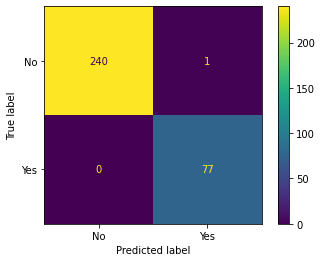


ROC Curve - test
----------------------------
Testing AUC: 1.0


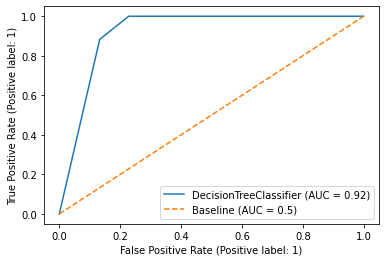

In [ ]:
# Crear instancia del modelo de regresión ML
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar modelo con datos de entrenamiento
knn.fit(X_train_processed,y_train)

# Obtener predicciones del conjunto de entrenamiento
train_preds=knn.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=knn.predict(X_test_processed)

# MÉTRICAS DE EVALUACIÓN
# Accuracy
accuracy_train = accuracy_score(y_train, train_preds)
accuracy_test = accuracy_score(y_test, test_preds)
# Precision
precision_train = precision_score(y_train, train_preds)
precision_test = precision_score(y_test, test_preds)
# Recall
recall_train = recall_score(y_train, train_preds)
recall_test = recall_score(y_test, test_preds)
# Matriz de confusión
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
# Specificity
specificity_test = cm[0,0]/(cm[0,0]+cm[0,1])
#Área bajo la curva de ROC
AUC_train=roc_auc_score(y_train, knn.predict_proba(X_train_processed)[:,1])
AUC_test=roc_auc_score(y_test, knn.predict_proba(X_test_processed)[:,1])

# Crear serie con valores a agregar a df
new_row = pd.Series(['KNN_n_neighbors_5',accuracy_train,precision_train,recall_train,AUC_train,
                     accuracy_test,precision_test,recall_test,specificity_test,AUC_test],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

## Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo ML')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Accuracy:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Precision:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Recall:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Clasification report - train')
print('----------------------------')
print(classification_report(y_train, train_preds, target_names=target_names))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Accuracy:',round(bench_model_df.loc[len(bench_model_df)-1][5],4))
print('Precision:',round(bench_model_df.loc[len(bench_model_df)-1][6],4))
print('Recall:',round(bench_model_df.loc[len(bench_model_df)-1][7],4))
print('Specificity:',round(bench_model_df.loc[len(bench_model_df)-1][8],4))
print('Clasification report - test')
print('----------------------------')
print(classification_report(y_test, test_preds, target_names=target_names, digits=4))
print('Confusion matrix - test')
print('----------------------------')
disp.plot()
plt.show()
print('\nROC Curve - test')
print('----------------------------')
print(f'Testing AUC: {round(bench_model_df.loc[len(bench_model_df)-1][9],4)}')
RocCurveDisplay.from_estimator(dec_tree, X_test_processed, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();
plt.show()

###4.3.2. Modelo con hiperparámetro(s) afinado(s)

In [ ]:
# Revisar hiperparámetros del modelo
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# Grilla de parámetros
# Agregar experimentos independientes como diccionarios
# <https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier>
param_grid = [{#'algorithm': ('auto'),
               #'leaf_size': [30],
               #'metric': ('minkowski'),
               #'metric_params': (None),
               #'n_jobs': (None),
               'n_neighbors': [int(x) for x in np.linspace(start = 1, stop = 100, num = 100)],
               #'p': [2],
               'weights': ('uniform','distance')
               }
]


# Crear instancia del modelo de regresión ML
knn_class = KNeighborsClassifier()

#KNeighborsClassifier(n_neighbors=5)

# Crear instancia de grilla de búsqueda de hiperparámetros
grid_search = GridSearchCV(knn_class, param_grid, cv=5,        # cd=5 iteraciones para cada prueba
                           return_train_score=True)

# Ajustar la grilla al conjunto de datos de entrenamiento
grid_search.fit(X_train_processed, y_train)


# Notas: desventajas del método con modelos con muchos hiperparámetros, que lo convierte en un ejercicio complejo

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'weights': ('uniform', 'distance')}],
             return_train_score=True)

In [ ]:
# Inicializar instancia de validación cruzada en la regreseión
cvres = grid_search.cv_results_
# zip junta parámetros en dos listas como uno a uno
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values) # Mostramos el accuracy y el n_estimator en cada prueba de validación

(0.995945945945946, {'n_neighbors': 1, 'weights': 'uniform'})
(0.995945945945946, {'n_neighbors': 1, 'weights': 'distance'})
(0.9972972972972972, {'n_neighbors': 2, 'weights': 'uniform'})
(0.995945945945946, {'n_neighbors': 2, 'weights': 'distance'})
(0.9986486486486486, {'n_neighbors': 3, 'weights': 'uniform'})
(0.995945945945946, {'n_neighbors': 3, 'weights': 'distance'})
(0.9986486486486486, {'n_neighbors': 4, 'weights': 'uniform'})
(0.9986486486486486, {'n_neighbors': 4, 'weights': 'distance'})
(0.9986486486486486, {'n_neighbors': 5, 'weights': 'uniform'})
(0.9986486486486486, {'n_neighbors': 5, 'weights': 'distance'})
(0.9891891891891891, {'n_neighbors': 6, 'weights': 'uniform'})
(0.9986486486486486, {'n_neighbors': 6, 'weights': 'distance'})
(0.9891891891891891, {'n_neighbors': 7, 'weights': 'uniform'})
(0.9972972972972972, {'n_neighbors': 7, 'weights': 'distance'})
(0.9797569381461999, {'n_neighbors': 8, 'weights': 'uniform'})
(0.9972972972972972, {'n_neighbors': 8, 'weights': '

Métricas de evaluación del modelo ML
Nombre del modelo: KNN_n_neighbors_4_weights_uniform
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Accuracy: 1.0
Precision: 0.99
Recall: 1.0
Clasification report - train
----------------------------
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       562
         Yes       0.99      1.00      1.00       179

    accuracy                           1.00       741
   macro avg       1.00      1.00      1.00       741
weighted avg       1.00      1.00      1.00       741

-----------------------------------------------------
Conjunto de datos de prueba:
Accuracy: 0.9969
Precision: 0.9872
Recall: 1.0
Specificity: 0.9959
Clasification report - test
----------------------------
              precision    recall  f1-score   support

          No     1.0000    0.9959    0.9979       241
         Yes     0.9872    1.0000    0.9935        77

    accuracy          

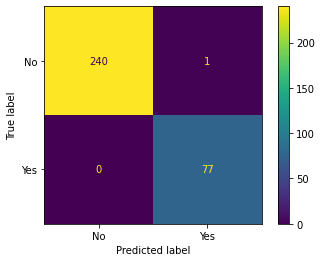


ROC Curve - test
----------------------------
Testing AUC: 1.0


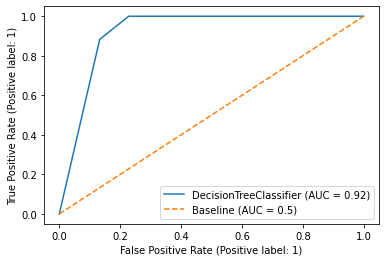

In [ ]:
# Crear instancia del modelo de regresión ML
knn_tunn = KNeighborsClassifier(n_neighbors=4, weights='uniform')

# Entrenar modelo con datos de entrenamiento
knn_tunn.fit(X_train_processed,y_train)

# Obtener predicciones del conjunto de entrenamiento
train_preds=knn_tunn.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=knn_tunn.predict(X_test_processed)

# MÉTRICAS DE EVALUACIÓN
# Accuracy
accuracy_train = accuracy_score(y_train, train_preds)
accuracy_test = accuracy_score(y_test, test_preds)
# Precision
precision_train = precision_score(y_train, train_preds)
precision_test = precision_score(y_test, test_preds)
# Recall
recall_train = recall_score(y_train, train_preds)
recall_test = recall_score(y_test, test_preds)
# Matriz de confusión
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
# Specificity
specificity_test = cm[0,0]/(cm[0,0]+cm[0,1])
#Área bajo la curva de ROC
AUC_train=roc_auc_score(y_train, knn_tunn.predict_proba(X_train_processed)[:,1])
AUC_test=roc_auc_score(y_test, knn_tunn.predict_proba(X_test_processed)[:,1])
,accuracy_train,precision_train,recall_train,AUC_train,

# Crear serie con valores a agregar a df
new_row = pd.Series(['KNN_n_neighbors_4_weights_uniform',accuracy_train,precision_train,recall_train,AUC_train,
                     accuracy_test,precision_test,recall_test,specificity_test,AUC_test],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

## Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo ML')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Accuracy:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Precision:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Recall:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Clasification report - train')
print('----------------------------')
print(classification_report(y_train, train_preds, target_names=target_names))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Accuracy:',round(bench_model_df.loc[len(bench_model_df)-1][5],4))
print('Precision:',round(bench_model_df.loc[len(bench_model_df)-1][6],4))
print('Recall:',round(bench_model_df.loc[len(bench_model_df)-1][7],4))
print('Specificity:',round(bench_model_df.loc[len(bench_model_df)-1][8],4))
print('Clasification report - test')
print('----------------------------')
print(classification_report(y_test, test_preds, target_names=target_names, digits=4))
print('Confusion matrix - test')
print('----------------------------')
disp.plot()
plt.show()
print('\nROC Curve - test')
print('----------------------------')
print(f'Testing AUC: {round(bench_model_df.loc[len(bench_model_df)-1][9],4)}')
RocCurveDisplay.from_estimator(dec_tree, X_test_processed, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();
plt.show()

##4.5. Regresión logística

In [ ]:
df.columns


Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

###4.5.1. Modelo por defecto

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Métricas de evaluación del modelo ML
Nombre del modelo: LogisticRegression
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Accuracy: 0.82
Precision: 0.78
Recall: 0.36
Clasification report - train
----------------------------
              precision    recall  f1-score   support

          No       0.83      0.97      0.89       562
         Yes       0.78      0.36      0.50       179

    accuracy                           0.82       741
   macro avg       0.80      0.67      0.69       741
weighted avg       0.82      0.82      0.80       741

-----------------------------------------------------
Conjunto de datos de prueba:
Accuracy: 0.8333
Precision: 0.8158
Recall: 0.4026
Specificity: 0.971
Clasification report - test
----------------------------
              precision    recall  f1-score   support

          No     0.8357    0.9710    0.8983       241
         Yes     0.8158    0.4026    0.5391        77

    accuracy                     

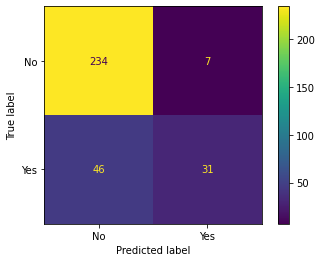


ROC Curve - test
----------------------------
Testing AUC: 0.8909


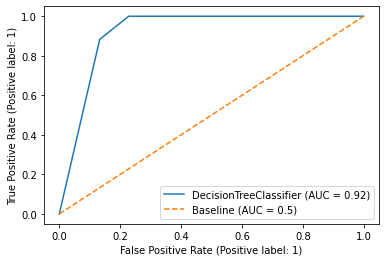

In [ ]:
# Crear instancia del modelo ML
logreg = LogisticRegression(C = 1000,solver='liblinear')

# Crear instancia Scaler
scaler = StandardScaler()

# Crear pipeline
logreg_pipe = make_pipeline(scaler, logreg)

# Entrenar modelo con datos de entrenamiento
# Aprenderá la relación entre X e y
logreg_pipe.fit(X_train,y_train)

# Obtener predicciones del conjunto de entrenamiento
train_preds=logreg_pipe.predict(X_train)

# Obtener predicciones del conjunto de prueba
test_preds=logreg_pipe.predict(X_test)

# MÉTRICAS DE EVALUACIÓN
# Accuracy
accuracy_train = accuracy_score(y_train, train_preds)
accuracy_test = accuracy_score(y_test, test_preds)
# Precision
precision_train = precision_score(y_train, train_preds)
precision_test = precision_score(y_test, test_preds)
# Recall
recall_train = recall_score(y_train, train_preds)
recall_test = recall_score(y_test, test_preds)
# Matriz de confusión
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
#Área bajo la curva de ROC
AUC_train=roc_auc_score(y_train, logreg_pipe.predict_proba(X_train_processed)[:,1])
AUC_test=roc_auc_score(y_test, logreg_pipe.predict_proba(X_test_processed)[:,1])
# Specificity
specificity_test = cm[0,0]/(cm[0,0]+cm[0,1])

# Crear serie con valores a agregar a df
new_row = pd.Series(['LogisticRegression',accuracy_train,precision_train,recall_train,AUC_train,
                     accuracy_test,precision_test,recall_test,specificity_test,AUC_test],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

## Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo ML')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Accuracy:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Precision:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Recall:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Clasification report - train')
print('----------------------------')
print(classification_report(y_train, train_preds, target_names=target_names))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Accuracy:',round(bench_model_df.loc[len(bench_model_df)-1][5],4))
print('Precision:',round(bench_model_df.loc[len(bench_model_df)-1][6],4))
print('Recall:',round(bench_model_df.loc[len(bench_model_df)-1][7],4))
print('Specificity:',round(bench_model_df.loc[len(bench_model_df)-1][8],4))
print('Clasification report - test')
print('----------------------------')
print(classification_report(y_test, test_preds, target_names=target_names, digits=4))
print('Confusion matrix - test')
print('----------------------------')
disp.plot()
plt.show()
print('\nROC Curve - test')
print('----------------------------')
print(f'Testing AUC: {round(bench_model_df.loc[len(bench_model_df)-1][9],4)}')
RocCurveDisplay.from_estimator(dec_tree, X_test_processed, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();
plt.show()

In [ ]:
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

0.8218623481781376
0.8333333333333334


###4.5.2. Modelo con hiperparámetro(s) afinado(s)

#### 4.5.2.1. Regularización L1

{0.0001: 0.7578616352201258,
 0.001: 0.7578616352201258,
 0.01: 0.7578616352201258,
 0.1: 0.8176100628930818,
 1: 0.8301886792452831,
 10: 0.8333333333333334,
 100: 0.8333333333333334,
 1000: 0.8333333333333334}

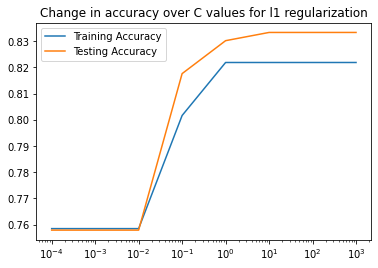

In [ ]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

#### 4.5.2.2. Regularización L2

{0.0001: 0.8018867924528302,
 0.001: 0.8018867924528302,
 0.01: 0.8333333333333334,
 0.1: 0.8333333333333334,
 1: 0.8301886792452831,
 10: 0.8333333333333334,
 100: 0.8333333333333334,
 1000: 0.8333333333333334}

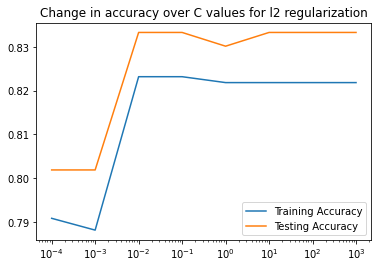

In [ ]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

####4.5.2.3. Selección de hiperparámetros

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Métricas de evaluación del modelo ML
Nombre del modelo: LogisticRegression_penalty_l1_C_1
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Accuracy: 0.82
Precision: 0.78
Recall: 0.36
Clasification report - train
----------------------------
              precision    recall  f1-score   support

          No       0.83      0.97      0.89       562
         Yes       0.78      0.36      0.50       179

    accuracy                           0.82       741
   macro avg       0.80      0.67      0.69       741
weighted avg       0.82      0.82      0.80       741

-----------------------------------------------------
Conjunto de datos de prueba:
Accuracy: 0.8302
Precision: 0.8108
Recall: 0.3896
Specificity: 0.971
Clasification report - test
----------------------------
              precision    recall  f1-score   support

          No     0.8327    0.9710    0.8966       241
         Yes     0.8108    0.3896    0.5263        77

    accuracy      

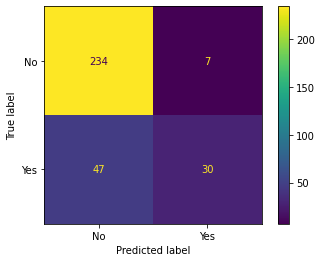


ROC Curve - test
----------------------------
Testing AUC: 0.8909


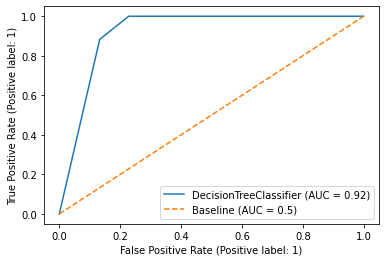

In [ ]:
# Crear instancia del modelo ML
logreg = LogisticRegression(solver='liblinear', penalty='l1',C=1, class_weight=None)

# Crear instancia Scaler
scaler = StandardScaler()

# Crear pipeline
logreg_pipe = make_pipeline(scaler, logreg)

# Entrenar modelo con datos de entrenamiento
# Aprenderá la relación entre X e y
logreg_pipe.fit(X_train,y_train)

# Obtener predicciones del conjunto de entrenamiento
train_preds=logreg_pipe.predict(X_train)

# Obtener predicciones del conjunto de prueba
test_preds=logreg_pipe.predict(X_test)

# MÉTRICAS DE EVALUACIÓN
# Accuracy
accuracy_train = accuracy_score(y_train, train_preds)
accuracy_test = accuracy_score(y_test, test_preds)
# Precision
precision_train = precision_score(y_train, train_preds)
precision_test = precision_score(y_test, test_preds)
# Recall
recall_train = recall_score(y_train, train_preds)
recall_test = recall_score(y_test, test_preds)
# Matriz de confusión
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
#Área bajo la curva de ROC
AUC_train=roc_auc_score(y_train, logreg_pipe.predict_proba(X_train_processed)[:,1])
AUC_test=roc_auc_score(y_test, logreg_pipe.predict_proba(X_test_processed)[:,1])
# Specificity
specificity_test = cm[0,0]/(cm[0,0]+cm[0,1])

# Crear serie con valores a agregar a df
new_row = pd.Series(['LogisticRegression_penalty_l1_C_1',accuracy_train,precision_train,recall_train,AUC_train,
                     accuracy_test,precision_test,recall_test,specificity_test,AUC_test],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

## Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo ML')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Accuracy:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Precision:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Recall:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Clasification report - train')
print('----------------------------')
print(classification_report(y_train, train_preds, target_names=target_names))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Accuracy:',round(bench_model_df.loc[len(bench_model_df)-1][5],4))
print('Precision:',round(bench_model_df.loc[len(bench_model_df)-1][6],4))
print('Recall:',round(bench_model_df.loc[len(bench_model_df)-1][7],4))
print('Specificity:',round(bench_model_df.loc[len(bench_model_df)-1][8],4))
print('Clasification report - test')
print('----------------------------')
print(classification_report(y_test, test_preds, target_names=target_names, digits=4))
print('Confusion matrix - test')
print('----------------------------')
disp.plot()
plt.show()
print('\nROC Curve - test')
print('----------------------------')
print(f'Testing AUC: {round(bench_model_df.loc[len(bench_model_df)-1][9],4)}')
RocCurveDisplay.from_estimator(dec_tree, X_test_processed, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();
plt.show()

##4.6. Comparación entre modelos ML


In [ ]:
round(bench_model_df[['accuracy_test','precision_test','recall_test','specificity_test','AUC_test']],6)

,accuracy_test,precision_test,recall_test,specificity_test,AUC_test
0,0.993711,1.000000,0.974026,1.000000,0.987013
1,0.871069,0.680000,0.883117,0.867220,0.920273
2,0.993711,0.987013,0.987013,0.995851,0.999946
3,0.996855,1.000000,0.987013,1.000000,0.999946
4,1.000000,1.000000,1.000000,1.000000,1.000000
5,1.000000,1.000000,1.000000,1.000000,1.000000
6,0.996855,0.987179,1.000000,0.995851,1.000000
7,0.996855,0.987179,1.000000,0.995851,1.000000
8,0.833333,0.815789,0.402597,0.970954,0.890877
9,0.830189,0.810811,0.389610,0.970954,0.890877


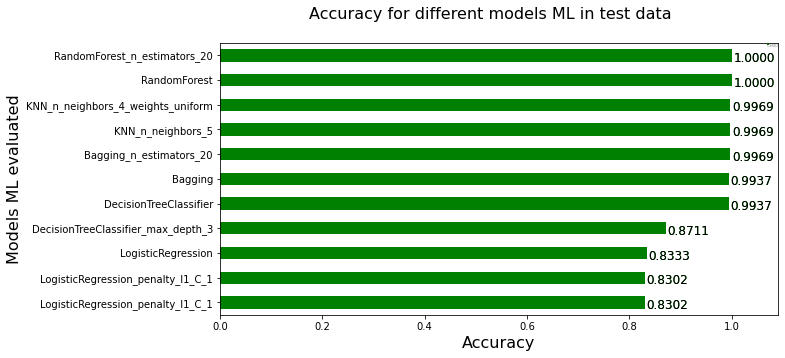

In [ ]:
# Gráfico de barras para Accuracy
ax2=bench_model_df.sort_values('accuracy_test',ascending=True).plot(x='Name_model',y='accuracy_test',kind='barh',figsize=(10,5),color='g')
plt.suptitle('Accuracy for different models ML in test data',fontsize=16);
plt.xlabel('Accuracy',fontsize=16)
plt.ylabel('Models ML evaluated',fontsize=16)
plt.axis([0,1.09,-0.5,len(bench_model_df)-0.5])
plt.legend(fontsize=0)

# Colocar etiquetas en barras
for bar in ax2.patches:
  # The text annotation for each bar should be its height.
  #bar_value = bar.get_height()
  bar_value = bar.get_width()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:.4f}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() + 0.085 #/ 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar.get_height() + 0 - 0.1 #+ bar_value 
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax2.text(text_x, text_y, text, ha='right', va='top', color=bar_color,
          size=12)
  ax2.text(text_x, text_y, text, ha='right', va='top', color='black',
          size=12)
plt.show()

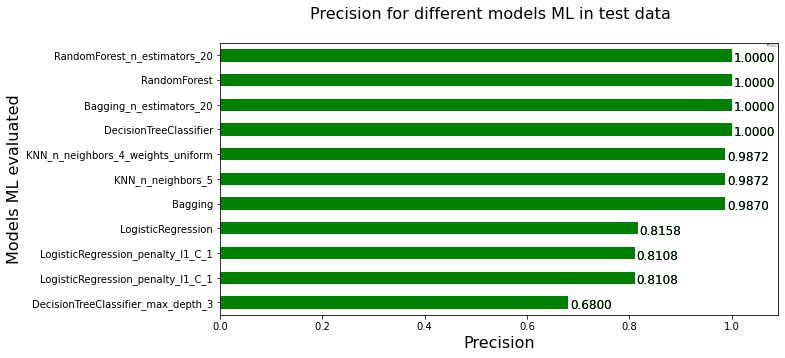

In [ ]:
# Gráfico de barras para Precision
ax2=bench_model_df.sort_values('precision_test',ascending=True).plot(x='Name_model',y='precision_test',kind='barh',figsize=(10,5),color='g')
plt.suptitle('Precision for different models ML in test data',fontsize=16);
plt.xlabel('Precision',fontsize=16)
plt.ylabel('Models ML evaluated',fontsize=16)
plt.axis([0,1.09,-0.5,len(bench_model_df)-0.5])
plt.legend(fontsize=0)

# Colocar etiquetas en barras
for bar in ax2.patches:
  # The text annotation for each bar should be its height.
  #bar_value = bar.get_height()
  bar_value = bar.get_width()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:.4f}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() + 0.085 #/ 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar.get_height() + 0 - 0.1 #+ bar_value 
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax2.text(text_x, text_y, text, ha='right', va='top', color=bar_color,
          size=12)
  ax2.text(text_x, text_y, text, ha='right', va='top', color='black',
          size=12)
plt.show()

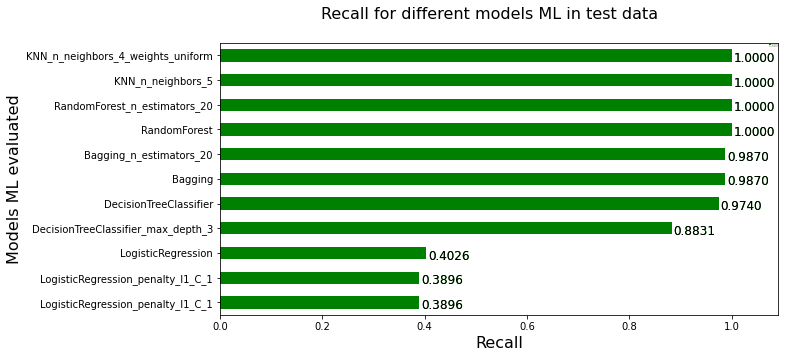

In [ ]:
# Gráfico de barras para Recall
ax2=bench_model_df.sort_values('recall_test',ascending=True).plot(x='Name_model',y='recall_test',kind='barh',figsize=(10,5),color='g')
plt.suptitle('Recall for different models ML in test data',fontsize=16);
plt.xlabel('Recall',fontsize=16)
plt.ylabel('Models ML evaluated',fontsize=16)
plt.axis([0,1.09,-0.5,len(bench_model_df)-0.5])
plt.legend(fontsize=0)

# Colocar etiquetas en barras
for bar in ax2.patches:
  # The text annotation for each bar should be its height.
  #bar_value = bar.get_height()
  bar_value = bar.get_width()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:.4f}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() + 0.085 #/ 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar.get_height() + 0 - 0.1 #+ bar_value 
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax2.text(text_x, text_y, text, ha='right', va='top', color=bar_color,
          size=12)
  ax2.text(text_x, text_y, text, ha='right', va='top', color='black',
          size=12)
plt.show()

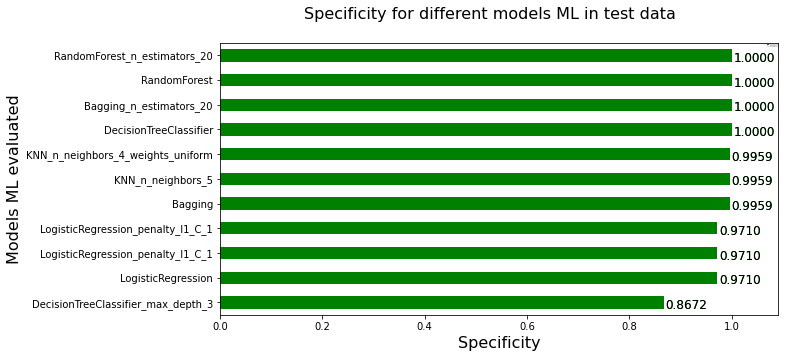

In [ ]:
# Gráfico de barras para Specificity
ax2=bench_model_df.sort_values('specificity_test',ascending=True).plot(x='Name_model',y='specificity_test',kind='barh',figsize=(10,5),color='g')
plt.suptitle('Specificity for different models ML in test data',fontsize=16);
plt.xlabel('Specificity',fontsize=16)
plt.ylabel('Models ML evaluated',fontsize=16)
plt.axis([0,1.09,-0.5,len(bench_model_df)-0.5])
plt.legend(fontsize=0)

# Colocar etiquetas en barras
for bar in ax2.patches:
  # The text annotation for each bar should be its height.
  #bar_value = bar.get_height()
  bar_value = bar.get_width()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:.4f}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() + 0.085 #/ 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar.get_height() + 0 - 0.1 #+ bar_value 
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax2.text(text_x, text_y, text, ha='right', va='top', color=bar_color,
          size=12)
  ax2.text(text_x, text_y, text, ha='right', va='top', color='black',
          size=12)
plt.show()

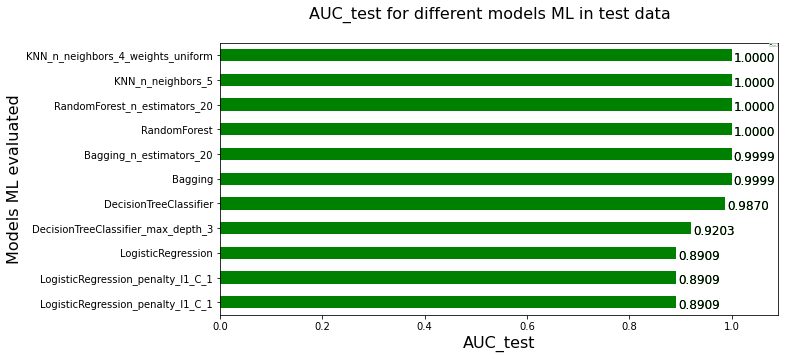

In [ ]:
# Gráfico de barras para ROC AUC
ax2=bench_model_df.sort_values('AUC_test',ascending=True).plot(x='Name_model',y='AUC_test',kind='barh',figsize=(10,5),color='g')
plt.suptitle('AUC_test for different models ML in test data',fontsize=16);
plt.xlabel('AUC_test',fontsize=16)
plt.ylabel('Models ML evaluated',fontsize=16)
plt.axis([0,1.09,-0.5,len(bench_model_df)-0.5])
plt.legend(fontsize=0)

# Colocar etiquetas en barras
for bar in ax2.patches:
  # The text annotation for each bar should be its height.
  #bar_value = bar.get_height()
  bar_value = bar.get_width()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:.4f}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() + 0.085 #/ 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar.get_height() + 0 - 0.1 #+ bar_value 
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax2.text(text_x, text_y, text, ha='right', va='top', color=bar_color,
          size=12)
  ax2.text(text_x, text_y, text, ha='right', va='top', color='black',
          size=12)
plt.show()

#5.Conclusiones


In [ ]:
round(bench_model_df[['accuracy_test','precision_test','recall_test','specificity_test','AUC_test']],6)

,accuracy_test,precision_test,recall_test,specificity_test,AUC_test
0,0.993711,1.000000,0.974026,1.000000,0.987013
1,0.871069,0.680000,0.883117,0.867220,0.920273
2,0.993711,0.987013,0.987013,0.995851,0.999946
3,0.996855,1.000000,0.987013,1.000000,0.999946
4,1.000000,1.000000,1.000000,1.000000,1.000000
5,1.000000,1.000000,1.000000,1.000000,1.000000
6,0.996855,0.987179,1.000000,0.995851,1.000000
7,0.996855,0.987179,1.000000,0.995851,1.000000
8,0.833333,0.815789,0.402597,0.970954,0.890877
9,0.830189,0.810811,0.389610,0.970954,0.890877
